In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [25]:
image = mpimg.imread('bbox-example-image.jpg')
templist = ['cutout1.jpg', 'cutout2.jpg', 'cutout3.jpg',
            'cutout4.jpg', 'cutout5.jpg', 'cutout6.jpg']

In [26]:
def draw_boxes(img, bboxes, color=(0,0,255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw rectangular given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

In [31]:
def find_matches(img, template_list):
    """Takes as inputs an image and a list of template, then search the image and returns a list
    of bounding boxes for matched templates
    """
    # Defines an empty list to take bbox xcoords
    bbox_list = []
    # iterate through the template list
    for template in template_list:
        img_temp = mpimg.imread('cutouts/'+template)
        h,w,c = img_temp.shape
        # Apply template Matching
        method = eval('cv2.TM_SQDIFF')
        res = cv2.matchTemplate(img,img_temp,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        top_left = min_loc
        bottom_right = (min_loc[0]+w,min_loc[1]+h)
        bbox_list.append((top_left, bottom_right))
    return draw_boxes(img, bbox_list)

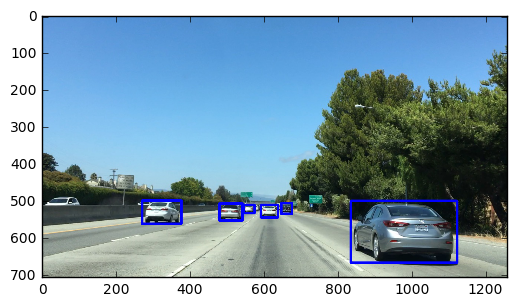

In [32]:
plt.imshow(find_matches(image, templist))